 # <div class="alert alert-danger" > Text Summarizing </div>
There's so much text in today's world, pretty much none of us have 
enough time to read all the things we wish we had time to. So, one of 
the most exciting applications I've seen of 
large language models is to use it to 
summarize text, and this is something that I'm seeing multiple teams 
build into multiple software applications. 
You can do this in the chatGPT web interface. I do this all 
the time to summarize articles so I can just kind of read 
the content of many more articles than I 
previously could, and if you want to do this more programmatically you'll 
see how to in this lesson. 
So with that, let's dig into the code to 
see how you could use this yourself to summarize text.

### <div class="alert alert-success" > Setup</div>
let's start off with the same starter code as you saw before 
of import OpenAI, load the API key, and here's that get 
completion helper function. 

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]


### <div class="alert alert-success" >Text to summarize

I'm going to use as the running example the task 
of summarizing the following product review. 

In [3]:
prod_review = """

Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.

"""

If you're building an 
e-commerce website, and there's just a large volume 
of reviews, having a tool to summarize the lengthy reviews could 
give you a way to very quickly glance 
over more reviews to get a better sense 
of what all your customers are thinking. So, here's a prompt for generating 
a summary.

#### <div class="alert alert-info" >Summarize with a word/sentence/character limit

Your task is to generate a 
short summary of a product review from e-commerce 
website, summarize review below, and so on, in 
at most 30 words. :

In [4]:
prompt = f"""

Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```

"""

# response = get_completion(prompt)
# print(response)


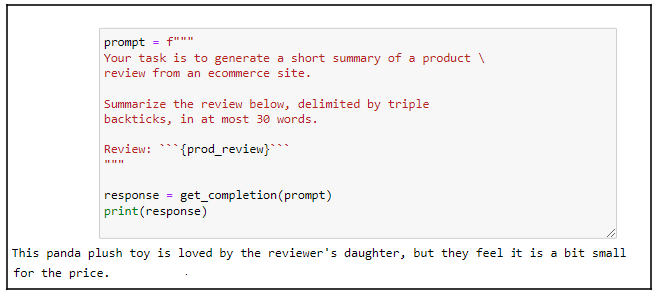

Not bad, it's 
a pretty good summary. And as you saw in the previous video, you 
can also play with things like controlling the character 
count or the number of sentences to affect the length of this 
summary.

#### <div class="alert alert-info" > Summarize with a focus on shipping and delivery


Now, sometimes when creating a summary, if 
you have a very specific purpose in mind 
for the summary, for example, if you want to give feedback 
to the shipping department, you can also modify the 
prompt to reflect that, so that they can generate a summary 
that is more applicable to one particular group in 
your business.

In [5]:
prompt = f"""


Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping deparmtment. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product. 

Review: ```{prod_review}```


"""

# response = get_completion(prompt)
# print(response)


 And if I run this, then, again you 
get a summary, but instead of starting off with 
Soft and Cute Panda Plush Toy, it now 
focuses on the fact that it arrived a day earlier than expected. And then 
it still has, you know, other details then. 

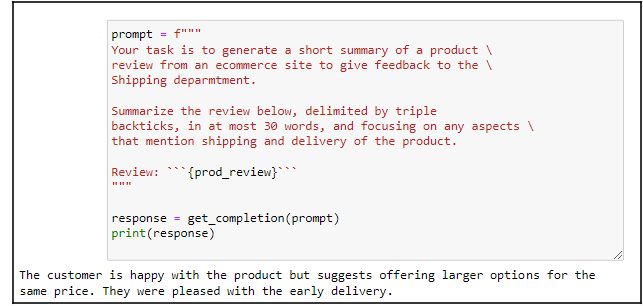

#### <div class="alert alert-info" > Summarize with a focus on price and value
    
Or as another example, if we aren't trying to give feedback 
to their shipping department, but let's say 
we want to give feedback to the pricing department. 
 
So the pricing department is responsible to determine 
the price of the product, and I'm going to tell it to focus on any 
aspects that are relevant to the price and 
perceived value.     

In [6]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.  

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

# response = get_completion(prompt)
# print(response)


Then, this generates a different summary that it says, 
maybe the price may be too high for a size. 

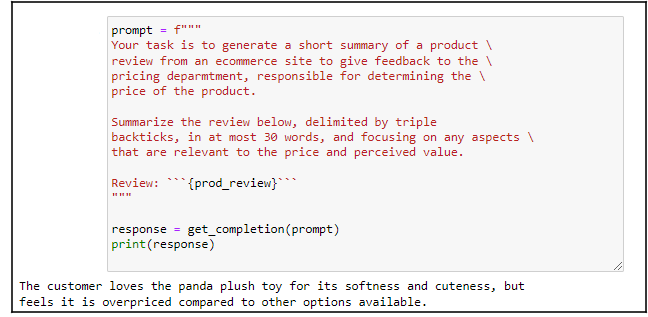

Now in the summaries that I've generated for the 
shipping department or the pricing department, it 
focus a bit more on information relevant to 
those specific departments. And in fact, feel free to pause 
the video now and maybe ask it to generate information for the 
product department responsible for the customer 
experience of the product, or for something else that 
you think might be interesting to an e-commerce site. 
 
#### Comment
- Summaries include topics that are not related to the topic of focus.

### <div class="alert alert-success" > Try "extract" instead of "summarize"


In these summaries, even though it 
generated the information relevant to shipping, 
it had some other information too, which you could decide may 
or may not be helpful. 

So, depending on how you want to summarize it, 
you can also ask it to extract information 
rather than summarize it. So here's a prompt:

In [7]:
prompt = f"""
Your task is to extract relevant information from \ 
a product review from an ecommerce site to give \
feedback to the Shipping department. 

From the review below, delimited by triple quotes \
extract the information relevant to shipping and \ 
delivery. Limit to 30 words. 

Review: ```{prod_review}```
"""

# response = get_completion(prompt)
# print(response)

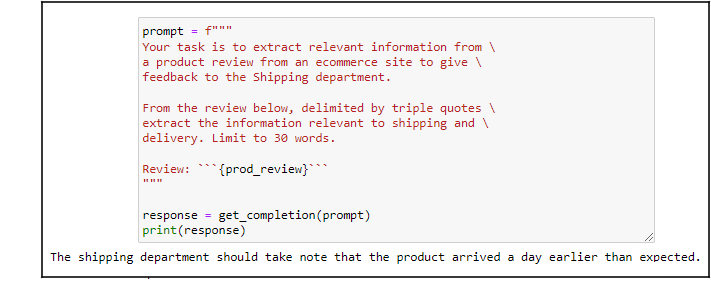
And now it just says, `The shipping department should take note that the product arrived a day earlier than expected.` without all of the other information, which 
was also helpful in a general summary, but less 
specific to the shipping department if all it wants to know is 
what happened with the shipping. 

### <div class="alert alert-success" > Summarize multiple product reviews
    
Lastly, let me just share with you a concrete 
example for how to use this in a workflow to help summarize 
multiple reviews to make them easier to read. 
So, here are a few reviews.
    
And I'm going to put all of these reviews into a list:

In [8]:

review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]



And 
now, if I implement or loop over the reviews, so, here's my 
prompt. And here I've asked it to summarize it in at 
most 20 words. 

In [9]:
for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product \ 
    review from an ecommerce site. 

    Summarize the review below, delimited by triple \
    backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

#     response = get_completion(prompt)
#     print(i, response, "\n")


Then let's have it 
get the response and print it out. 

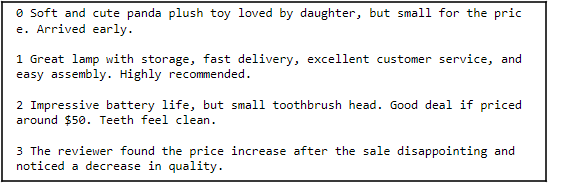

If you have a website where you have hundreds of reviews, 
you can imagine how you might use this 
to build a dashboard to take huge numbers of reviews, 
generate short summaries of them so that you or someone else can 
browse the reviews much more quickly. And then, 
if they wish, maybe click in to see the original longer review. 
And this can help you efficiently get a 
better sense of what all of your customers are thinking. 
 
That's it for summarizing. And 
I hope that you can picture, if you have any applications with 
many pieces of text, how you can use prompts 
like these to summarize them to help people 
quickly get a sense of what's in the text, the many 
pieces of text, and perhaps optionally dig in more 
if they wish.

